<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EVALUACION/MAMANI_CHAMBI_SANDRA_VANESSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio Práctico: Previsión de Ventas de Café con TensorFlow Keras y Flask**

**1. Análisis y Preparación de Datos**

In [85]:
import pandas as pd
import os

# Definir la ruta correcta
ruta_archivos = '/content/'

# Verificar si los archivos existen en la ruta especificada
if os.path.exists(ruta_archivos + 'index_1.csv') and os.path.exists(ruta_archivos + 'index_2.csv'):
    try:
        print("Archivos encontrados. Procediendo a cargarlos...")

        # Cargar los archivos
        index_1 = pd.read_csv(ruta_archivos + 'index_1.csv', delimiter=',')  # Usar coma como delimitador
        index_2 = pd.read_csv(ruta_archivos + 'index_2.csv', delimiter=',')  # Usar coma como delimitador

        # Mostrar las primeras filas para verificar que los datos se cargaron correctamente
        print("Primeras filas de index_1:")
        print(index_1.head())
        print("\nPrimeras filas de index_2:")
        print(index_2.head())

        # Unir los datasets
        combined_data = pd.concat([index_1, index_2], ignore_index=True)

        # Mostrar las primeras filas del dataset combinado
        print("\nDatos combinados correctamente.")
        print(combined_data.head())
    except Exception as e:
        print(f"Hubo un error al cargar los archivos: {e}")
else:
    print("No se encontraron los archivos 'index_1.csv' o 'index_2.csv' en el directorio especificado.")


Archivos encontrados. Procediendo a cargarlos...
Primeras filas de index_1:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Primeras filas de index_2:
         date             datetime cash_type  money            coffee_name
0  2025-02-08  2025-02-08 14:26:04      cash   15.0                    Tea
1  2025-02-08  2025-02-08 14:28:26      cash   15.0                    Tea
2  2025-02-08  2025-02-08 14:33:04      card   20.0               Espresso
3

In [81]:
import os

# Verificar el contenido del directorio /content/
print("Archivos en el directorio actual:")
print(os.listdir('/content/'))


Archivos en el directorio actual:
['.config', '.ipynb_checkpoints', 'index_1.csv', 'index_2.csv', 'sample_data']


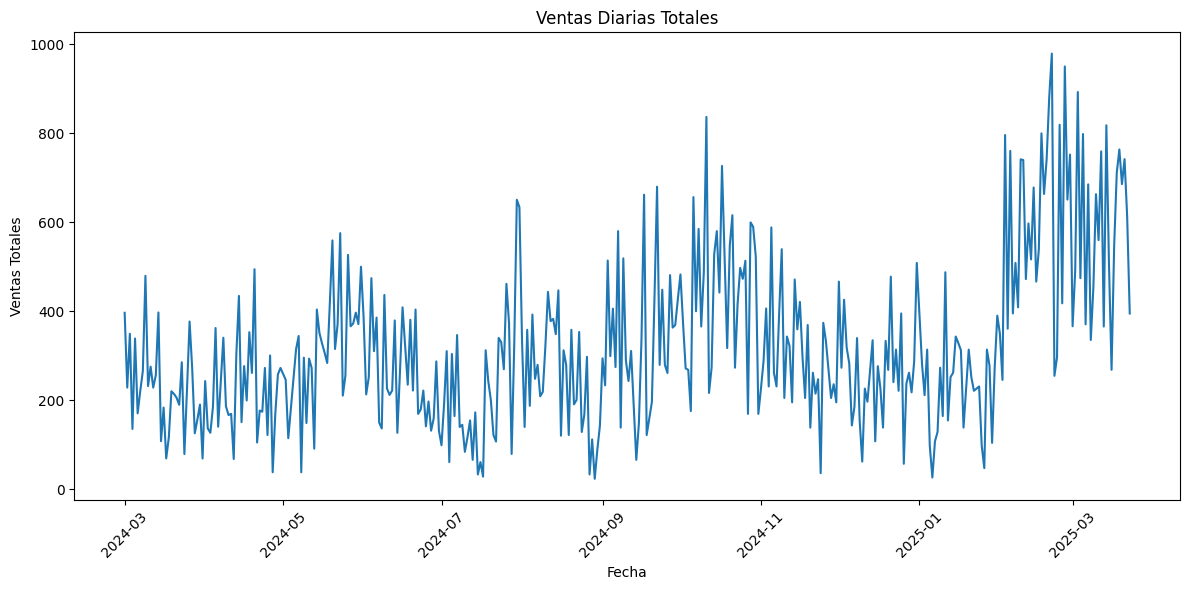

In [62]:
#### Análisis Exploratorio de Datos (EDA)

import matplotlib.pyplot as plt
import pandas as pd

# Asegurarnos de que 'datetime' es de tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Crear una nueva columna 'date' solo con la fecha
df['date'] = df['datetime'].dt.date

# Agrupar por la columna 'date' y calcular las ventas totales por día
daily_sales = df.groupby('date')['money'].sum()

# Visualizar los resultados
plt.figure(figsize=(12,6))
daily_sales.plot(title='Ventas Diarias Totales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)  # Rotar etiquetas de fechas si es necesario
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()


In [32]:
### Ingeniería de Características
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que 'datetime' sea tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# Extraer mes, día de la semana y hora
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek  # Lunes=0, Domingo=6
df['hour'] = df['datetime'].dt.hour
# Crear la columna 'cantidad_total_vendida_no_dia'
df['date'] = df['datetime'].dt.date  # Extraemos solo la fecha
daily_sales = df.groupby('date')['money'].sum().reset_index()  # Sumar ventas por día
df = df.merge(daily_sales[['date', 'money']], on='date', suffixes=('', '_total_dia'))  # Unir los datos
# Codificar la variable categórica 'coffee_name' usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['coffee_name'], drop_first=True)
# Verificamos las primeras filas del DataFrame con las nuevas características
print(df_encoded.head())

         date                datetime cash_type                 card  money  \
0  2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

   hour  day_of_week  month  money_total_dia  money_total_dia  ...  \
0    10            4      3            396.3            396.3  ...   
1    12            4      3            396.3            396.3  ...   
2    12            4      3            396.3            396.3  ...   
3    13            4      3            396.3            396.3  ...   
4    13            4      3            396.3            396.3  ...   

   coffee_name_Hot milkshake  coffee_name_Irish whiskey  \
0                      False                 

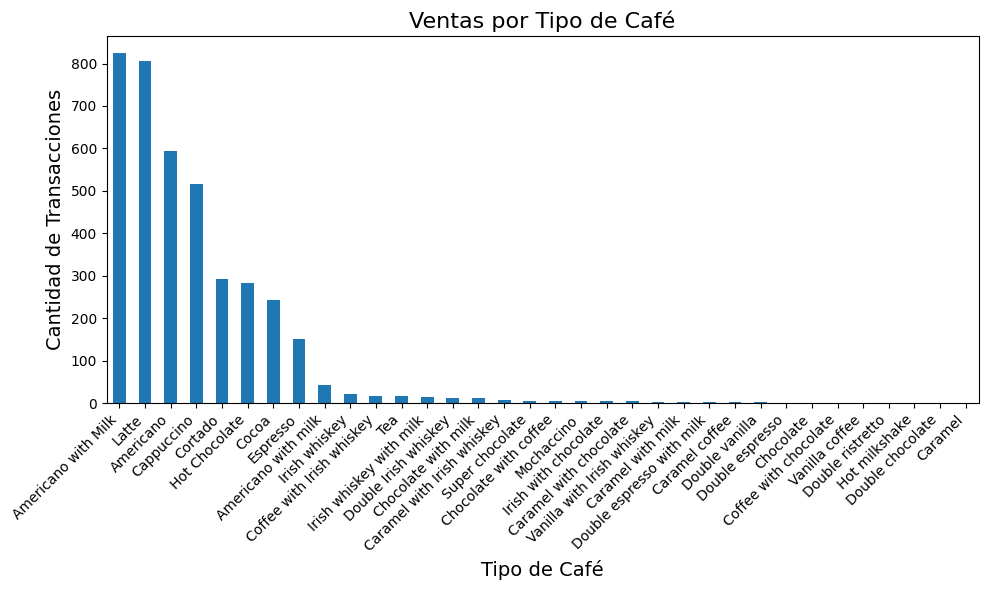

In [33]:
# **Gráfico de Ventas por Tipo de Café**
plt.figure(figsize=(10, 6))

# Contar las transacciones por tipo de café y graficarlas
df['coffee_name'].value_counts().plot(kind='bar')

# Agregar título y etiquetas
plt.title('Ventas por Tipo de Café', fontsize=16)
plt.ylabel('Cantidad de Transacciones', fontsize=14)
plt.xlabel('Tipo de Café', fontsize=14)

# Mejorar la legibilidad de las etiquetas del eje x (en caso de que los nombres de los cafés sean largos)
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [95]:
### División entrenamiento/prueba
from sklearn.model_selection import train_test_split

# Verifica las columnas
print("Columnas disponibles:", combined_data.columns)

# Reemplaza 'money' por el nombre correcto si es diferente
X = combined_data.drop('money', axis=1)
y = combined_data['money']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)


Columnas disponibles: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
Tamaño de X_train: (3118, 5)
Tamaño de X_test: (780, 5)


**2. Modelado Predictivo (con TensorFlow Keras)**

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#  Verificar columnas disponibles
print("Columnas disponibles:", combined_data.columns)

# Extraer mes, día de la semana y hora de 'datetime'
if 'datetime' in combined_data.columns:
    combined_data['datetime'] = pd.to_datetime(combined_data['datetime'], format='mixed')
    combined_data['mes'] = combined_data['datetime'].dt.month
    combined_data['dia_semana'] = combined_data['datetime'].dt.dayofweek  # Lunes=0, Domingo=6
    combined_data['hora'] = combined_data['datetime'].dt.hour

# Definir características y objetivos
features = []
if 'mes' in combined_data.columns:
    features.append('mes')
if 'dia_semana' in combined_data.columns:
    features.append('dia_semana')
if 'hora' in combined_data.columns:
    features.append('hora')
if 'coffee_name' in combined_data.columns:
    features.append('coffee_name')
if not features:
    features = list(combined_data.columns)
    if 'cantidad_total_vendida_no_dia' in features: features.remove('cantidad_total_vendida_no_dia')
    if 'cantidad_vendida' in features: features.remove('cantidad_vendida')

# Ajustar nombres de los objetivos
target_total = 'cantidad_total_vendida_no_dia' if 'cantidad_total_vendida_no_dia' in combined_data.columns else None
target_individual = 'cantidad_vendida' if 'cantidad_vendida' in combined_data.columns else None

if target_total is None or target_individual is None:
    print("¡Atención! Falta columna objetivo. Usando 'money' como objetivo.")
    target_total = 'money' if 'money' in combined_data.columns else None
    target_individual = 'money' if 'money' in combined_data.columns else None

if target_total is None:
    print("No se encontró columna objetivo. Ajusta el nombre según tus datos.")
    exit()

# Separar características y objetivos
X = combined_data[features]
y_total = combined_data[target_total]
y_individual = combined_data[target_individual] if target_individual is not None else y_total

# Preprocesador
numeric_features = [f for f in features if f in ['mes', 'dia_semana', 'hora']]
categorical_features = [f for f in features if f not in numeric_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocesar X
X_preprocessed = preprocessor.fit_transform(X)

# Dividir datos (usando índices para consistencia)
indices = np.arange(X_preprocessed.shape[0])
X_train, X_test, idx_train, idx_test = train_test_split(
    X_preprocessed, indices, test_size=0.2, random_state=42)

y_total_train, y_total_test = y_total.iloc[idx_train], y_total.iloc[idx_test]
y_individual_train, y_individual_test = y_individual.iloc[idx_train], y_individual.iloc[idx_test]

# Modelo para predecir cantidad_total_vendida_no_dia (o 'money')
model_total = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_preprocessed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_total.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model_total.fit(X_train, y_total_train, epochs=50, batch_size=32, validation_split=0.2)

#  Modelo para predecir cantidad_vendida individual (o 'money')
model_individual = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_preprocessed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_individual.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model_individual.fit(X_train, y_individual_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluación de los modelos
y_total_pred = model_total.predict(X_test)
print("\nMétricas para cantidad_total_vendida_no_dia (o 'money'):")
print("MAE:", mean_absolute_error(y_total_test, y_total_pred.ravel()))
print("MSE:", mean_squared_error(y_total_test, y_total_pred.ravel()))
print("RMSE:", np.sqrt(mean_squared_error(y_total_test, y_total_pred.ravel())))
print("R²:", r2_score(y_total_test, y_total_pred.ravel()))

y_individual_pred = model_individual.predict(X_test)
print("\nMétricas para cantidad_vendida individual (o 'money'):")
print("MAE:", mean_absolute_error(y_individual_test, y_individual_pred.ravel()))
print("MSE:", mean_squared_error(y_individual_test, y_individual_pred.ravel()))
print("RMSE:", np.sqrt(mean_squared_error(y_individual_test, y_individual_pred.ravel())))
print("R²:", r2_score(y_individual_test, y_individual_pred.ravel()))


Columnas disponibles: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'mes',
       'dia_semana', 'hora'],
      dtype='object')
¡Atención! Falta columna objetivo. Usando 'money' como objetivo.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 932.8159 - mae: 30.0926 - mse: 932.8159 - val_loss: 585.7407 - val_mae: 23.5922 - val_mse: 585.7407
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 409.9593 - mae: 18.8506 - mse: 409.9593 - val_loss: 36.0722 - val_mae: 4.8955 - val_mse: 36.0722
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.4664 - mae: 4.0094 - mse: 24.4664 - val_loss: 14.6192 - val_mae: 3.0456 - val_mse: 14.6192
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.1749 - mae: 2.7923 - mse: 12.1749 - val_loss: 10.1541 - val_mae: 2.5629 - val_mse: 10.1541
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1873 - mae: 2.4535 - mse: 9.1873 - val_loss: 8.1894 - val_mae: 2.3066 - val_mse: 8.1894
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.4917 - mae: 2.2169 - mse: 7.4917 - val_loss: 7.0546 - val_mae: 2.1261 - val_mse: 7.0546
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.0299 - mae: 2.1313 - mse: 7.0299 - val

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 924.8739 - mae: 29.9649 - mse: 924.8739 - val_loss: 526.8334 - val_mae: 22.3541 - val_mse: 526.8334
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 363.6480 - mae: 17.6791 - mse: 363.6480 - val_loss: 26.9371 - val_mae: 4.2585 - val_mse: 26.9371
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1409 - mae: 3.8507 - mse: 22.1409 - val_loss: 13.4956 - val_mae: 2.9254 - val_mse: 13.4956
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.1920 - mae: 2.7892 - mse: 12.1920 - val_loss: 9.2284 - val_mae: 2.4043 - val_mse: 9.2284
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.2587 - mae: 2.4038 - mse: 9.2587 - val_loss: 7.6748 - val_mae: 2.2042 - val_mse: 7.6748
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3187 - mae: 2.1729 - mse: 7.3187 - val_loss: 6.7738 - val_mae: 2.0805 - val_mse: 6.7738
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4189 - mae: 2.0110 - mse: 6.4189 - val_

*Modelado Predictivo: cantidad_total_vendida_no_dia*

In [107]:
### Construcción del Modelo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_total = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Salida para regresión
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
###  Compilación y Entrenamiento
model_total.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

history = model_total.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 903.2163 - mae: 29.5707 - mse: 903.2163 - val_loss: 341.3550 - val_mae: 17.6758 - val_mse: 341.3550
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 172.6493 - mae: 11.1374 - mse: 172.6493 - val_loss: 20.0262 - val_mae: 3.6109 - val_mse: 20.0262
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.8976 - mae: 3.2815 - mse: 16.8976 - val_loss: 11.8818 - val_mae: 2.7947 - val_mse: 11.8818
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.8491 - mae: 2.6634 - mse: 10.8491 - val_loss: 9.2974 - val_mae: 2.4838 - val_mse: 9.2974
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2255 - mae: 2.4439 - mse: 9.2255 - val_loss: 7.8552 - val_mae: 2.2812 - val_mse: 7.8552
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7521 - mae: 2.2655 - mse: 7.7521 - val_loss: 6.7933 - val_mae: 2.1226 - val_mse: 6.7933
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6323 - mae: 2.0858 

In [112]:
###  Evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_total.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MAE: 0.7700677989568465, MSE: 1.5080737154553867, RMSE: 1.2280365285509167, R²: 0.9439360114197629


*Modelado Predictivo: cantidad_vendida por coffee_name (multi-output)*

In [121]:
import numpy as np

# Supón que tienes una lista de coffee_name en tu DataFrame
# df es tu DataFrame de ventas
num_coffee_names = len(df['coffee_name'].unique())


In [123]:
### Construcción del Modelo Multi-output
from tensorflow import keras
from tensorflow.keras import layers

model_multi = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_coffee_names)  # Ahora num_coffee_names está definido
])
print(model_multi.summary())



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,802 (34.38 KB)

 Trainable params: 8,802 (34.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [132]:
import pandas as pd

# Supón que df es tu DataFrame ya cargado
print(df.columns.tolist())  # ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'hour', 'day_of_week', 'month', 'money_total_dia', 'money_total_dia', 'money_total_dia', 'money_total_dia', 'target']

# Elimina columnas duplicadas de 'money_total_dia' (si las hay)
df = df.loc[:, ~df.columns.duplicated()]


['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'hour', 'day_of_week', 'month', 'money_total_dia', 'money_total_dia', 'money_total_dia', 'money_total_dia', 'target']


In [133]:
# Tabla dinámica de dinero vendido por coffee_name
pivot_money = pd.pivot_table(
    df,
    values='money',
    index=df.index,         # Puedes cambiar el índice según lo que necesites (por ejemplo, 'date')
    columns='coffee_name',
    aggfunc='sum',
    fill_value=0
)

print(pivot_money)


coffee_name  Americano  Americano with Milk  Americano with milk  Cappuccino  \
0                  0.0                  0.0                  0.0         0.0   
1                  0.0                  0.0                  0.0         0.0   
2                  0.0                  0.0                  0.0         0.0   
3                 28.9                  0.0                  0.0         0.0   
4                  0.0                  0.0                  0.0         0.0   
...                ...                  ...                  ...         ...   
3891               0.0                  0.0                  0.0        30.0   
3892               0.0                  0.0                  0.0         0.0   
3893               0.0                  0.0                  0.0         0.0   
3894               0.0                  0.0                  0.0         0.0   
3895               0.0                  0.0                  0.0         0.0   

coffee_name  Caramel  Caramel coffee  C

In [157]:
# X_train: características (por ejemplo, 'cash_type', 'card', 'hour', 'day_of_week', 'month')
features = ['cash_type', 'card', 'hour', 'day_of_week', 'month']
X_train = df[features]

# y_train_multi: monto vendido por coffee_name (pivot_money)
y_train_multi = pivot_money

# Si el índice de pivot_money no coincide con el de X_train, haz un merge o reindexa
# Por ejemplo, si X_train y pivot_money tienen el mismo índice:
# y_train_multi = pivot_money.loc[X_train.index]


In [151]:
### Construcción, Compilación y Entrenamiento del Modelo
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Convierte X_train a DataFrame (si es array)
X_train = pd.DataFrame(X_train, columns=['cash_type', 'card', 'hour', 'day_of_week', 'month'])

# 2. Convierte columnas categóricas a numéricas
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

# 3. Convierte a arrays de NumPy y a float32
X_train = np.array(X_train, dtype='float32')
y_train_multi = np.array(y_train_multi, dtype='float32')

# 4. Construcción, compilación y entrenamiento del modelo
from tensorflow import keras
from tensorflow.keras import layers

num_coffee_names = len(df['coffee_name'].unique())

model_multi = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_coffee_names)
])

model_multi.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

history = model_multi.fit(
    X_train, y_train_multi,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 758.6749 - mae: 13.3324 - mse: 758.6749 - val_loss: 29.2277 - val_mae: 2.8447 - val_mse: 29.2277
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.9831 - mae: 1.9422 - mse: 26.9831 - val_loss: 26.1741 - val_mae: 2.2593 - val_mse: 26.1741
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.9633 - mae: 1.8621 - mse: 25.9633 - val_loss: 25.8932 - val_mae: 2.0885 - val_mse: 25.8932
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.5675 - mae: 1.7705 - mse: 25.5675 - val_loss: 26.5922 - val_mae: 2.1917 - val_mse: 26.5922
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.6672 - mae: 1.7837 - mse: 25.6672 - val_loss: 26.8434 - val_mae: 2.2838 - val_mse: 26.8434
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.8425 - mae: 1.8106 - mse: 25.8425 - val_loss: 25.5772 - val_mae: 1.9743 - val_mse: 25.5772
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 25.8339 - mae: 1.801

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


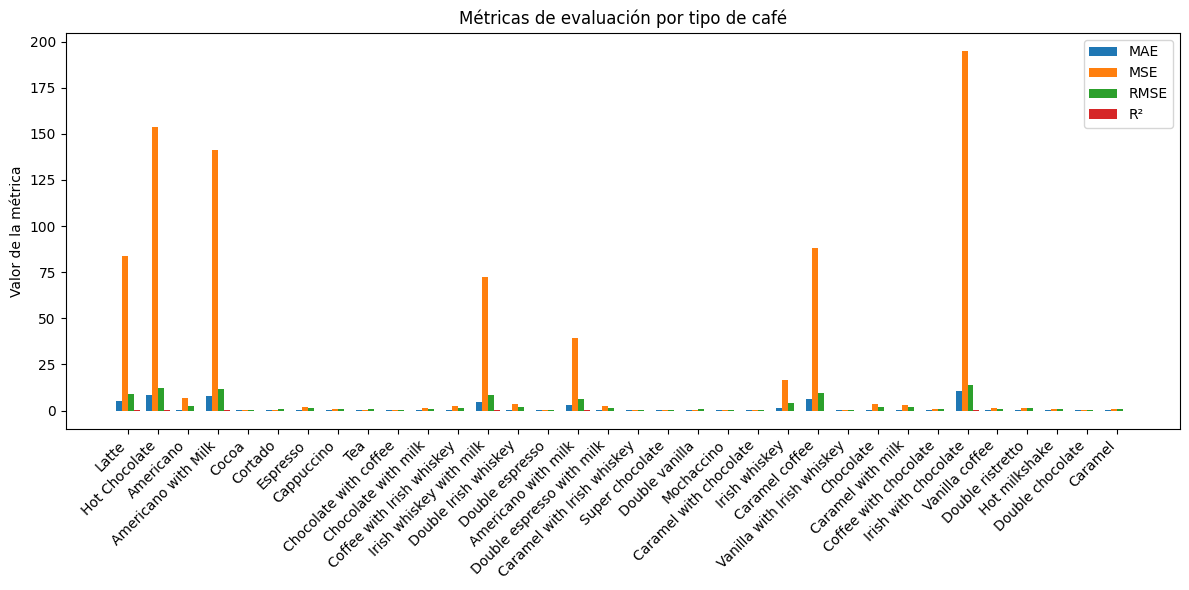

In [154]:
###  Evaluación del Modelo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicciones
y_pred = model_multi.predict(X_train)

# Nombres de los tipos de café (de df)
nombres_coffee = df['coffee_name'].unique()

# Listas para almacenar métricas
maes = []
mses = []
rmses = []
r2s = []

for i in range(y_train_multi.shape[1]):
    mae = mean_absolute_error(y_train_multi[:, i], y_pred[:, i])
    mse = mean_squared_error(y_train_multi[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train_multi[:, i], y_pred[:, i])
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)

# Gráfico de barras para las métricas
x = np.arange(len(nombres_coffee))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width*1.5, maes, width, label='MAE')
ax.bar(x - width/2, mses, width, label='MSE')
ax.bar(x + width/2, rmses, width, label='RMSE')
ax.bar(x + width*1.5, r2s, width, label='R²')

ax.set_ylabel('Valor de la métrica')
ax.set_title('Métricas de evaluación por tipo de café')
ax.set_xticks(x)
ax.set_xticklabels(nombres_coffee, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


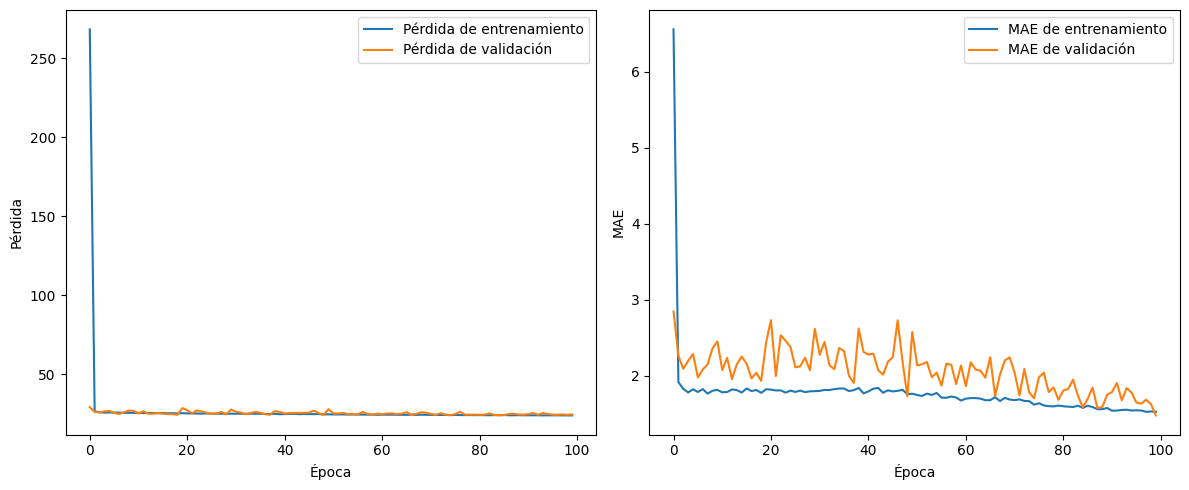

In [155]:
### Visualización adicional: Curvas de pérdida y métricas durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


In [160]:
# Suma el monto vendido por cada tipo de café
ventas_por_cafe = pivot_money.sum()
cafe_mas_vendido = ventas_por_cafe.idxmax()
monto_mas_vendido = ventas_por_cafe.max()

print(f"El café más vendido es: {cafe_mas_vendido}")
print(f"Con un monto total de: {monto_mas_vendido:.2f}")
# Agrupa por día de la semana y suma el monto total vendido
ventas_por_dia = df.groupby('day_of_week')['money'].sum()
dia_mas_vendido = ventas_por_dia.idxmax()
monto_dia_mas_vendido = ventas_por_dia.max()

dias = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
print("Un día de la semana es:", dias[1])  # Imprime: Un día de la semana es: martes


print(f"El día que más se vende es: {dia_mas_vendido}")
print(f"Con un monto total de: {monto_dia_mas_vendido:.2f}")


El café más vendido es: Latte
Con un monto total de: 28658.30
Un día de la semana es: martes
El día que más se vende es: 1
Con un monto total de: 19148.38


# **3. Serialización del Modelo**

In [168]:
# Guardar en formato HDF5 (.h5)
model_multi.save('modelo_cafe.keras')
model_multi.save('modelo_cafe.h5')


In [169]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Supón que tienes un diccionario de preprocesadores
# (por ejemplo, uno para cada columna categórica)
preprocesadores = {}

for col in features:
    if col in ['cash_type', 'card']:  # Ejemplo: solo columnas categóricas
        le = LabelEncoder()
        le.fit(df[col])
        preprocesadores[col] = le

# Guardar preprocesadores con pickle
with open('preprocesadores.pkl', 'wb') as f:
    pickle.dump(preprocesadores, f)

# Alternativa con joblib (para objetos grandes)
from joblib import dump
dump(preprocesadores, 'preprocesadores.joblib')


['preprocesadores.joblib']

In [172]:
# Guardar modelo de Keras
model_multi.save('modelo_cafe.h5')

# Guardar preprocesadores
import pickle

preprocesadores = {}
for col in features:
    if col in ['cash_type', 'card']:  # Ajusta según tus columnas categóricas
        le = LabelEncoder()
        le.fit(df[col])
        preprocesadores[col] = le

with open('preprocesadores.pkl', 'wb') as f:
    pickle.dump(preprocesadores, f)


In [174]:
from tensorflow import keras
from tensorflow.keras.losses import MeanSquaredError
import pickle

# 1. Cargar el modelo
# Si guardaste el modelo como '.h5', usa esto:
modelo_cargado = keras.models.load_model(
    'modelo_cafe.h5',
    custom_objects={'mse': MeanSquaredError()}
)

# Si guardaste el modelo como '.keras', normalmente no necesitas custom_objects,
# pero puedes usarlo igual por seguridad:
# modelo_cargado = keras.models.load_model('modelo_cafe.keras')

# 2. Cargar los preprocesadores
with open('preprocesadores.pkl', 'rb') as f:
    preprocesadores_cargados = pickle.load(f)

# 3. (Opcional) Verificar que todo se cargó correctamente
print("Modelo cargado:", type(modelo_cargado))
print("Preprocesadores cargados:", preprocesadores_cargados)

Modelo cargado: <class 'keras.src.models.sequential.Sequential'>
Preprocesadores cargados: {'cash_type': LabelEncoder(), 'card': LabelEncoder()}
